# Capstone Regression Project

<img src="images/house.png" width="600" height="600" align="center"/>

## Business Understanding

Best Fit Acquisitions (BFA) is a real-estate investment firm that, on behalf of their shareholders, acquires residential properties within King County and turns a profit with each sale. BFA has allocated part of their R&D funds to hire a data analyst, myself, to identify which aspects of a home most influences its price so that they can pin point their purchasing efforts.

## Data Understanding

The data used for modeling is a CSV file which contains data for 2021-2022 home sales in King County, Washington. The file has 30,155 records and 25 fields. One record represents the sale entry for a single home. The field used as the regression target is the 'price' column which is the price of the home at the time of sale. This data was supplied by Flatiron School.

## Data Preparation

### Loading the Data

In [1]:
# import relevant libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [2]:
# perform EDA
hd = pd.read_csv('data/kc_house_data.csv')
hd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
hd.shape

(30155, 25)

In [4]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
hd.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [6]:
# easier view of all columns
col = pd.DataFrame(hd.columns)
col

,0
0,id
1,date
2,price
3,bedrooms
4,bathrooms
5,sqft_living
6,sqft_lot
7,floors
8,waterfront
9,greenbelt


### Data Cleaning

In [7]:
# drop irrelevant column 'id'
hd = hd.drop('id', axis=1)

In [8]:
# identify any missing or null values
hd.isnull().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
greenbelt        False
nuisance         False
view             False
condition        False
grade            False
heat_source       True
sewer_system      True
sqft_above       False
sqft_basement    False
sqft_garage      False
sqft_patio       False
yr_built         False
yr_renovated     False
address          False
lat              False
long             False
dtype: bool

In [9]:
# two columns with null or missing values, 'heat_source' and 'sewer_system'
hd.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [10]:
# number of rows before deletion of null/missing values
hd.shape[0]

30155

In [11]:
# drop null/missing values
hd = hd.dropna()

In [12]:
# number of rows after deletion; 46 records deleted
hd.shape[0]

30111

In [13]:
# no null/missing values
hd.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [14]:
# change 'date' column to date-time object
hd['date'] = hd['date'].apply(lambda x: pd.to_datetime(x, yearfirst=True))

In [15]:
# feature engineer age of home
hd['home_age'] = np.where(hd['yr_renovated'] != 0, hd['date'].apply(lambda x:x.year) - hd['yr_renovated'],
                    hd['date'].apply(lambda x:x.year) - hd['yr_built'])

In [16]:
# check the first record
hd.iloc[:1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,home_age
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53


## Modeling

### Baseline Model

In [17]:
# view 'number' data types
hd.select_dtypes('number').head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,home_age
0,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,0,47.461975,-122.19052,53
1,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,0,47.711525,-122.35591,71
2,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,0,47.502045,-122.22520,65
3,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,0,47.566110,-122.29020,11
4,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,2012,0,47.532470,-122.07188,9


In [18]:
# identify correlated columns of target column 'price'
hd.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
home_age        -0.126909
Name: price, dtype: float64

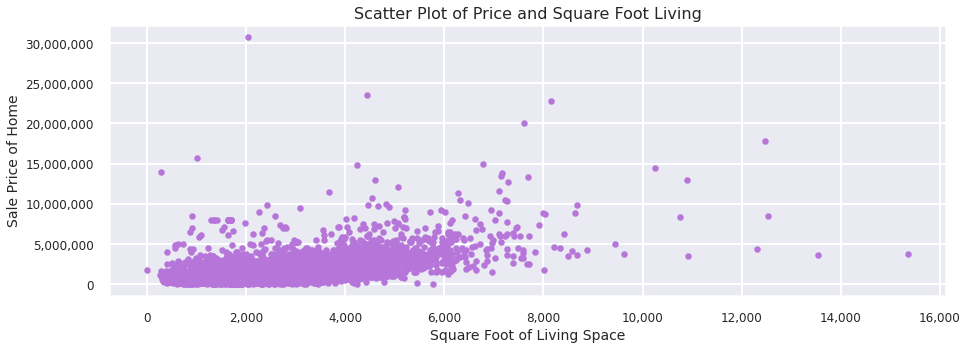

In [19]:
# scatter plot the target column 'price' and most correlated column 'sqft_living'

sns.set_style('darkgrid')
sns.set_context('poster',font_scale = .50)

fig, ax = plt.subplots(figsize=(15,5))
hd.plot.scatter('sqft_living', 'price', color='#B676D9', ax=ax)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Sale Price of Home', fontsize=14)
ax.set_xlabel('Square Foot of Living Space', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Scatter Plot of Price and Square Foot Living", fontsize=16);

#### Analysis
As can be seen in the scatter plot above, there are dozens of homes well above the mean price of 1,108,536, (some are even as high as 10 to 30 million dollars)! This may prove problematic for the regression model and will need to be addressed. 

In [20]:
# baseline simple linear regression model
# sqft_living has highest correlation; this column will be the independent variable
# definition: 'sqft_living' - Square footage of living space in the home

import statsmodels.api as sm

y = hd['price']
X = hd[['sqft_living']]

baseline_model = sm.OLS(endog=y, exog=sm.add_constant(X))
baseline_results = baseline_model.fit()

baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:05:59   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

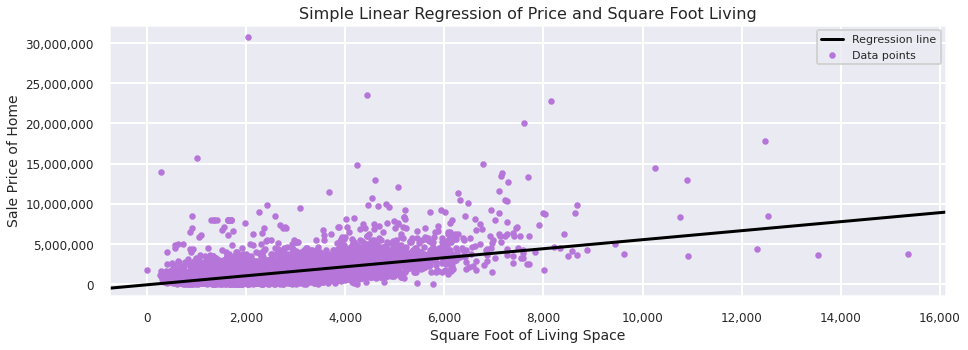

In [21]:
# plot simple linear regression line and scatter plot of 'price' and 'sqft_living'

fig, ax = plt.subplots(figsize=(15,5))

hd.plot.scatter("sqft_living", "price", color='#B676D9', label="Data points", ax=ax)

sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", color='black', ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Sale Price of Home', fontsize=14)
ax.set_xlabel('Square Foot of Living Space', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Simple Linear Regression of Price and Square Foot Living", fontsize=16)
plt.savefig('simp_lin_reg.png', dpi=300)
ax.legend();

#### Analysis
First visual impressions of this simple linear regression model indicate the model does not do a very good job attempting to fit all the points as best as possible for this real world data. Also, the slope of the best fit line appears rather low. Addressing the aforementioned outliers may prove useful.

In [22]:
# identify the residuals of the simple linear regression model
baseline_results.resid

0        8.918053e+04
1       -5.570358e+05
2       -1.227692e+06
3       -3.601226e+05
4        4.031133e+04
             ...     
30150    5.600057e+05
30151    2.563492e+05
30152   -3.244538e+04
30153   -5.899331e+05
30154   -9.702974e+04
Length: 30111, dtype: float64

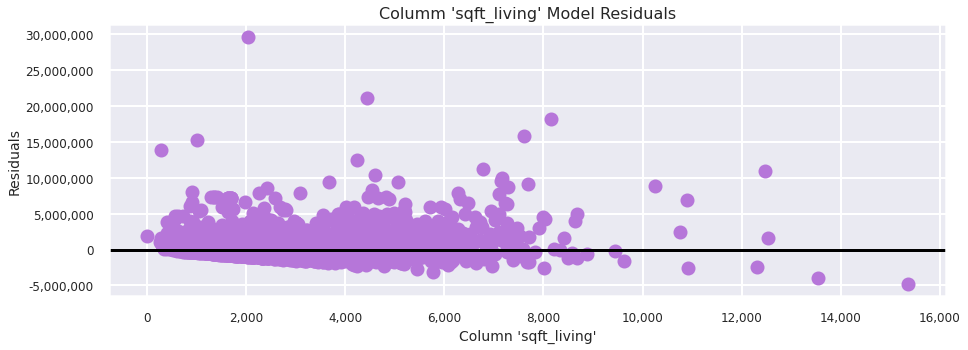

In [23]:
# Visualize homoscedasticity

fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(hd['sqft_living'], baseline_results.resid, color='#B676D9')
ax.axhline(y=0, color="black")
ax.set_xlabel("Column 'sqft_living'", fontsize=14)
ax.set_ylabel("Residuals", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Columm 'sqft_living' Model Residuals", fontsize=16);

In [24]:
from sklearn.metrics import mean_squared_error

y_pred = baseline_results.predict(sm.add_constant(X))

baseline_mse = mean_squared_error(y, y_pred, squared=False)
baseline_mse

711342.2307664382

### Summary of Simple Linear Regression Model
The model is statistically significant, as well as the coefficients, with an F-statistic p-value below a presumed alpha of 0.05. However, the model only explains 37% of the variance of the dependent variable 'price'. Each additional square foot in 'sqft_living' increases 'price' by 560 dollars. The majority of the errors (residuals) of the model are positive so the model is not homoscedastic due to lack of equal distribution of variance in errors. According to the mean squared error, on average the model is off by 711,342 dollars.

### Feature Engineering

In [25]:
# Feature engineer the price per square foot of living space 
hd['price_per_sqft_living'] = round(hd['price'] / hd['sqft_living'], 2)
hd.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,home_age,price_per_sqft_living
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,572.03
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,332.13
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,107.99
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,358.80
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,529.02


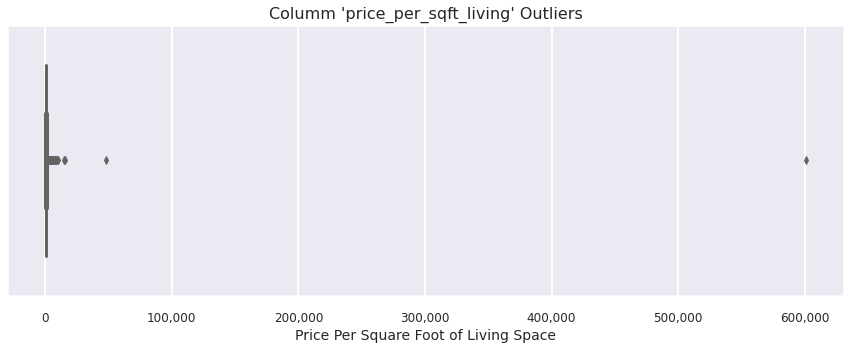

In [26]:
# plot boxplot demonstrating outliers according to newly feature engineered columm

fig, ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(x=hd['price_per_sqft_living'], color='#B676D9', width=.7)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Columm 'price_per_sqft_living' Outliers", fontsize=16)
ax.set_xlabel('Price Per Square Foot of Living Space', fontsize=14)
plt.xticks(fontsize=12);

#### Analysis
Several 'price_per_sqft_living' outliers are so high, the boxplot cannot display the interquartile range and therefore cannot convey where the median of this metric is located on the graph.

In [27]:
# remove outliers by filtering 'price_per_sqft_living'
upper_limit = 1028
new_hd = hd[hd['price_per_sqft_living']<upper_limit]
new_hd.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,home_age,price_per_sqft_living
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,572.03
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,332.13
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,107.99
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,358.80
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,529.02


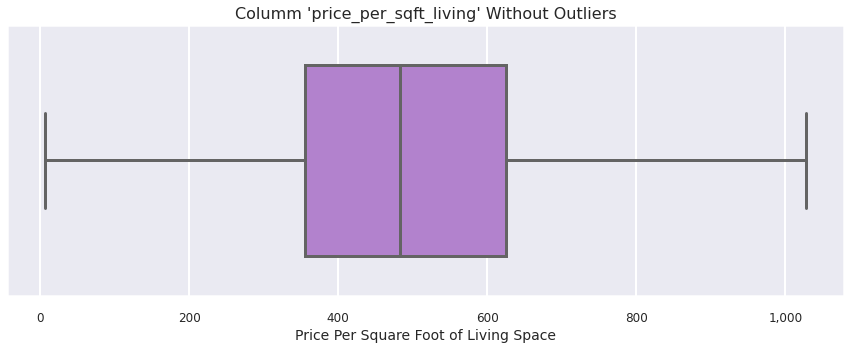

In [28]:
# plot boxplot with filtered data demonstrating no outliers

fig, ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(x=new_hd['price_per_sqft_living'], color='#B676D9', width=.7)

ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Columm 'price_per_sqft_living' Without Outliers", fontsize=16)
ax.set_xlabel('Price Per Square Foot of Living Space', fontsize=14)
plt.xticks(fontsize=12);

#### Analysis
The price per square foot of living space of the housing data without outliers are as follows:


25th percentile: 356 dollars per square foot of living space


50th percentile: 482 dollars per square foot of living space


75th percentile: 625 dollars per square foot of living space


Max: 1,027 dollars per square foot of living space

In [29]:
# revisit correlation to target column 'price'
new_hd.corr()['price'].sort_values(ascending=False)

price                    1.000000
sqft_living              0.722470
sqft_above               0.636515
bathrooms                0.574823
price_per_sqft_living    0.542148
bedrooms                 0.384584
sqft_garage              0.333188
sqft_patio               0.322471
sqft_basement            0.261093
floors                   0.235448
yr_built                 0.137315
sqft_lot                 0.096462
lat                      0.081434
yr_renovated             0.064119
long                    -0.031641
home_age                -0.165695
Name: price, dtype: float64

In [30]:
new_hd.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,home_age,price_per_sqft_living
count,2.906800e+04,29068.000000,29068.000000,29068.000000,2.906800e+04,29068.000000,29068.000000,29068.000000,29068.000000,29068.000000,29068.000000,29068.000000,29068.000000,29068.000000,29068.000000,29068.000000
mean,1.042371e+06,3.435255,2.345259,2119.760493,1.606286e+04,1.551070,1814.826166,475.004644,333.436803,216.288118,1975.833769,86.692067,47.321871,-121.303087,42.957479,501.028943
std,6.493316e+05,0.963452,0.869558,946.191298,5.262895e+04,0.568688,860.318922,574.265766,283.503902,241.591847,31.857308,407.122213,1.442041,5.768948,31.056729,187.286556
min,2.736000e+04,0.000000,0.000000,340.000000,4.020000e+02,1.000000,300.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480,-1.000000,6.920000
25%,6.400000e+05,3.000000,2.000000,1440.000000,4.807000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1954.000000,0.000000,47.398244,-122.326184,16.000000,355.910000
50%,8.500000e+05,3.000000,2.500000,1930.000000,7.420000e+03,1.500000,1570.000000,0.000000,400.000000,150.000000,1978.000000,0.000000,47.546805,-122.225466,40.500000,482.395000
75%,1.261000e+06,4.000000,3.000000,2620.000000,1.043625e+04,2.000000,2270.000000,950.000000,510.000000,310.000000,2003.250000,0.000000,47.669620,-122.114055,64.000000,625.000000
max,8.800000e+06,13.000000,10.500000,15360.000000,2.657160e+06,4.000000,12660.000000,6970.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340,122.000000,1027.780000


In [31]:
# metric used as part of recommendations located at bottom of notebook
sqft_liv_50th = new_hd[new_hd['sqft_living']>=1930]
len(sqft_liv_50th)

14627

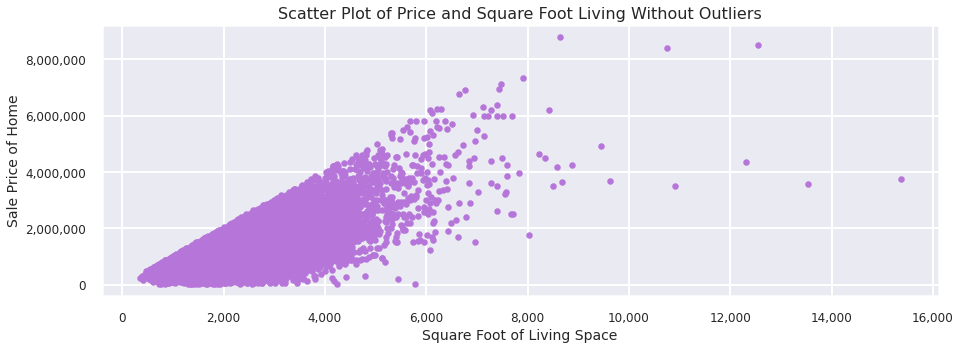

In [32]:
# scatter plot of the newly filtered data which has no outliers

fig, ax = plt.subplots(figsize=(15,5))

new_hd.plot.scatter('sqft_living', 'price', color='#B676D9', ax=ax)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Sale Price of Home', fontsize=14)
ax.set_xlabel('Square Foot of Living Space', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Scatter Plot of Price and Square Foot Living Without Outliers", fontsize=16);

#### Analysis
Now, instead of a scatter plot appearing like a low hanging cloud, the scatter plot exhibits a conical shape providing a visual indication the filtering of the data may have worked.

In [33]:
# re-run simple linear regression model without outliers

y_2 = new_hd['price']
X_2= new_hd[['sqft_living']]

baseline_model_2 = sm.OLS(endog=y_2, exog=sm.add_constant(X_2))
baseline_results_2 = baseline_model_2.fit()

baseline_results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                 3.174e+04
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:06:01   Log-Likelihood:            -4.1956e+05
No. Observations:               29068   AIC:                         8.391e+05
Df Residuals:                   29066   BIC:                         8.391e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8609.4634   6460.480     -1.333      0.183   -2.13e+04    4053.373
sqft_living   495.8013      2.783    178.148      0.000     490.346     501.256
==============================================================================
Omnibus:                     5259.921   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26897.720
Skew:                           0.785   Prob(JB):                         0.00
Kurtosis:                       7.443   Cond. No.                     5.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

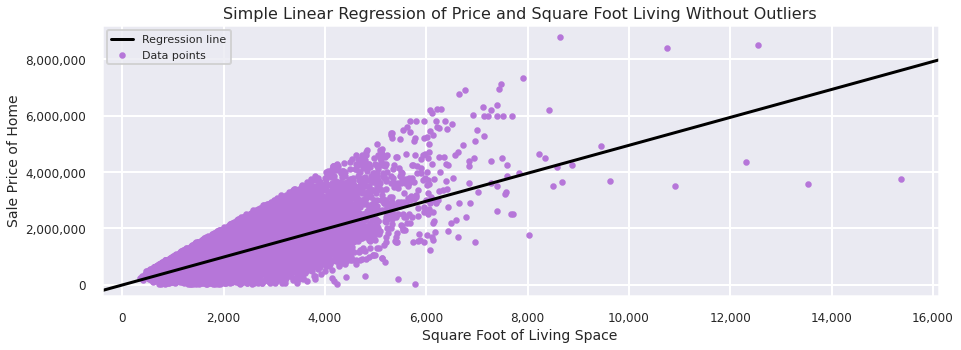

In [34]:
# re-plot simple linear regression line and scatter plot of 'price' and 'sqft_living'
# with filtered data

fig, ax = plt.subplots(figsize=(15,5))

new_hd.plot.scatter("sqft_living", "price", color='#B676D9', label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results_2, label="Regression line", color='black', ax=ax)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Sale Price of Home', fontsize=14)
ax.set_xlabel('Square Foot of Living Space', fontsize=14)

plt.title("Simple Linear Regression of Price and Square Foot Living Without Outliers", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('simp_lin_reg_wout.png', dpi=300);
ax.legend();

#### Analysis
Visual impressions of this new simple linear regression model prove promising as now the best fit line has a steeper slope.

In [35]:
y_pred_2 = baseline_results_2.predict(sm.add_constant(X_2))

baseline_mse_2 = mean_squared_error(y_2, y_pred_2, squared=False)
baseline_mse_2

448941.4158202885

### Summary of Simple Linear Regression Model without Outliers

The model overall is statistically significant with the exception of the intercept. The model now explains 52.2% of the variance of 'price'; a 15% improvement! Each additional square foot in 'sqft_living' increases 'price' by 495 dollars. According to the mean squared error, on average the model is now off by 448,941 dollars; a 262,401 dollar improvement!

### Model Iteration

In [36]:
 # identify categorical columns to dummify and add to the linear regression model
hd.select_dtypes(object).head()

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ..."
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing..."
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9..."
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington..."
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt..."


#### Categorical Columns
Selecting 'view' and 'condition' as categorical columns to add to final model.

In [37]:
# condense categorical columm 'view' into just 3 possible values
# 'None', 'average', 'above average'
view_dict = {'NONE': 'None',
        'FAIR': 'Average',
        'AVERAGE': 'Average',
        'GOOD':'Above Average',
        'EXCELLENT':'Above Average'
       }

new_hd = new_hd.replace({'view': view_dict})
new_hd.view.value_counts()

None             25862
Average           2007
Above Average     1199
Name: view, dtype: int64

In [38]:
# condense categorical columm 'condition' into just 3 possible values
# 'below average', 'average', 'above average'

cond_dict = {'Poor': 'Below Average',
        'Fair': 'Below Average',
        'Average': 'Average',
        'Good':'Above Average',
        'Very Good':'Above Average'
       }

new_hd = new_hd.replace({'condition': cond_dict})
new_hd.condition.value_counts()

Average          17903
Above Average    10910
Below Average      255
Name: condition, dtype: int64

In [39]:
# set the target and predictor variables
y_3 = new_hd['price']
X_3 = new_hd[['sqft_living', 'bathrooms', 'view', 'condition']]
X_3.head()

,sqft_living,bathrooms,view,condition
0,1180,1.0,None,Above Average
1,2770,2.5,Average,Average
2,2880,2.0,Average,Average
3,2160,3.0,Average,Average
4,1120,2.0,None,Average


In [40]:
X_3 = pd.get_dummies(X_3, columns=['view', 'condition'])
X_3.drop(labels=['view_None', 'condition_Below Average'], inplace=True, axis=1)
X_3.head()

,sqft_living,bathrooms,view_Above Average,view_Average,condition_Above Average,condition_Average
0,1180,1.0,0,0,1,0
1,2770,2.5,0,1,0,1
2,2880,2.0,0,1,0,1
3,2160,3.0,0,1,0,1
4,1120,2.0,0,0,0,1


In [41]:
# multiple linear regression model
model_3 = sm.OLS(endog=y_3, exog=sm.add_constant(X_3))
results_3 = model_3.fit()
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     5519.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:06:03   Log-Likelihood:            -4.1923e+05
No. Observations:               29068   AIC:                         8.385e+05
Df Residuals:                   29061   BIC:                         8.385e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.172e+05   2.82e+04     -4.154      0.000   -1.73e+05   -6.19e+04
sqft_living               446.3088      4.329    103.090      0.000     437.823     454.794
bathrooms                5.089e+04   4652.826     10.937      0.000    4.18e+04       6e+04
view_Above Average       2.587e+05   1.34e+04     19.270      0.000    2.32e+05    2.85e+05
view_Average             1.354e+05   1.04e+04     13.023      0.000    1.15e+05    1.56e+05
condition_Above Average  9.791e+04   2.82e+04      3.472      0.001    4.26e+04    1.53e+05
condition_Average        6.075e+04   2.81e+04      2.159      0.031    5603.547    1.16e+05
==============================================================================
Omnibus:                     5359.068   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28584.401
Skew:                           0.789   Prob(JB):                         0.00
Kurtosis:                       7.595   Cond. No.                     4.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# calculate the new mean squared error of the model above
y_pred_3 = results_3.predict(sm.add_constant(X_3))

mse_3 = mean_squared_error(y_3, y_pred_3, squared=False)
print('Before:', baseline_mse_2)
print('After:', mse_3)

print('Difference:', baseline_mse_2 - mse_3)

Before: 448941.4158202885
After: 443921.3918824089
Difference: 5020.023937879596


### Summary of Multiple Linear Regression Model
This multiple linear regression model with 4 coefficients, ('sqft_living', 'bathrooms', 'view', 'condition'), is overall statistically significant as well as each coefficient. This model now explains 53.2% of the variance of the dependent variable 'price'. Also, according to the mean squared error, the model on average is now off by 443,921 dollars (a 5,020 dollar improvement). Below are each coefficient's effect on the target column 'price':

* 'sqft_living' adds 446 dollars to 'price' for each additional square foot
* 'bathrooms' adds 50,890 dollars to 'price' for each additional bathroom
* 'view_Above Average' adds 258,700 dollars to 'price' for an above average view relative to a 'None' view
* 'view_Average' only adds 135,400 dollars to 'price' relative to a 'None' view
* 'condition_Above Average' adds 97,910 dollars to 'price' for an above average condition home relative to a below average condition home
* 'condition_Average' adds 60,750 dollars to 'price' for an average condition home relative to a below average condition home

### Final Model

In [43]:
# identify numeric variables to potentially use in final model
new_hd.select_dtypes('number').head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,home_age,price_per_sqft_living
0,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,0,47.461975,-122.19052,53,572.03
1,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,0,47.711525,-122.35591,71,332.13
2,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,0,47.502045,-122.22520,65,107.99
3,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,0,47.566110,-122.29020,11,358.80
4,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,2012,0,47.532470,-122.07188,9,529.02


In [44]:
# new hd subset
sub_hd = new_hd[[
    'sqft_living',
    'sqft_above',
    'sqft_basement',
    'price',
    'view',
    'bathrooms',
    'condition'
]].copy()
sub_hd = pd.get_dummies(sub_hd, columns=['view','condition'])
sub_hd.drop(labels=['view_None','condition_Below Average'], inplace=True, axis=1)
sub_hd.head()

,sqft_living,sqft_above,sqft_basement,price,bathrooms,view_Above Average,view_Average,condition_Above Average,condition_Average
0,1180,1180,0,675000.0,1.0,0,0,1,0
1,2770,1570,1570,920000.0,2.5,0,1,0,1
2,2880,1580,1580,311000.0,2.0,0,1,0,1
3,2160,1090,1070,775000.0,3.0,0,1,0,1
4,1120,1120,550,592500.0,2.0,0,0,0,1


## Regression Results

In [45]:
# final model 
y_4 = sub_hd['price']
X_4 = sub_hd.drop(labels='price', axis=1)

model_4 = sm.OLS(endog=y_4, exog=sm.add_constant(X_4))
results_4 = model_4.fit()
results_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     4205.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:06:03   Log-Likelihood:            -4.1911e+05
No. Observations:               29068   AIC:                         8.382e+05
Df Residuals:                   29059   BIC:                         8.383e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.725e+05   2.83e+04     -6.089      0.000   -2.28e+05   -1.17e+05
sqft_living               271.9836     11.943     22.774      0.000     248.575     295.392
sqft_above                184.0778     11.842     15.545      0.000     160.867     207.288
sqft_basement             125.2286      8.886     14.093      0.000     107.812     142.645
bathrooms                5.519e+04   4644.229     11.883      0.000    4.61e+04    6.43e+04
view_Above Average       2.634e+05   1.35e+04     19.483      0.000    2.37e+05     2.9e+05
view_Average             1.312e+05   1.05e+04     12.503      0.000    1.11e+05    1.52e+05
condition_Above Average  1.262e+05   2.81e+04      4.486      0.000    7.11e+04    1.81e+05
condition_Average          7.8e+04   2.81e+04      2.780      0.005     2.3e+04    1.33e+05
==============================================================================
Omnibus:                     5328.014   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28947.046
Skew:                           0.778   Prob(JB):                         0.00
Kurtosis:                       7.634   Cond. No.                     5.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
y_pred_4 = results_4.predict(sm.add_constant(X_4))

mse_4 = mean_squared_error(y_4, y_pred_4, squared=False)
print('Before:', mse_3)
print('After:', mse_4)

print('Difference:', mse_3 - mse_4)

Before: 443921.3918824089
After: 442054.55962054816
Difference: 1866.8322618607199


### Summary of Final Multiple Linear Regression Model
This multiple linear regression model with 6 coefficients, ('sqft_living', 'sqft_above', 'sqft_basement', 'condition', 'bathrooms' and 'view'), is overall statistically significant as well as each coefficient. This model now explains 53.6% of the variance of the dependent variable 'price'. Also, according to the mean squared error, the model on average is now off by 442,054 dollars (a 1,866 dollar improvement). Below are each coefficient's effect on the target column 'price':

* 'sqft_living' adds 272 dollars to 'price' for each additional square foot
* 'sqft_above' adds 184 dollars to 'price' for each additional square foot
* 'sqft_basement' adds 125 dollars to 'price' for each additional square foot
* 'bathrooms' adds 55,190 dollars to 'price' for each additional bathroom
* 'view_Above Average' adds 263,400 dollars to 'price' for an above average view relative to a 'None' view
* 'view_Average' adds 131,200 dollars to 'price' relative to a 'None' view
* 'condition_Above Average' adds 126,200 dollars to 'price' for an above average condition home relative to a below average condition home
* 'condition_Average' adds 78,000 dollars to 'price' for an average condition home relative to a below average condition home

### Additional Models for Centered and Standardized Models

In [47]:
# Centered to provide a realistic intercept
y_c = sub_hd['price']
X_c = sub_hd.drop(labels='price', axis=1)


X_centered = X_c.copy()

for col in X_centered.columns:
     X_centered[col] = X_centered[col] - X_centered[col].mean()

In [48]:
model_c = sm.OLS(endog=y_c, exog=sm.add_constant(X_centered))
results_c = model_c.fit()
results_c.params[:1]

const    1.042371e+06
dtype: float64

#### Interpretation
All six selected coefficients being average, the average 'price' of a home is 1,042,000 dollars

In [49]:
# Standardization
# building a new model so that predictor variables are in standard deviations
X_stand = X_c.copy()

for col in X_stand:
    X_stand[col] = (X_stand[col] - X_stand[col].mean()) \
                            / X_stand[col].std()

model_s = sm.OLS(endog=y_c, exog=sm.add_constant(X_stand))
results_s = model_s.fit()
results_s.params.sort_values(ascending=False)

const                      1.042371e+06
sqft_living                2.573486e+05
sqft_above                 1.583656e+05
sqft_basement              7.191449e+04
condition_Above Average    6.112495e+04
view_Above Average         5.237362e+04
bathrooms                  4.798872e+04
condition_Average          3.793883e+04
view_Average               3.326815e+04
dtype: float64

The "most important" features of the model ordered by most impactful to least impactful are:

 1) 'sqft_living'
 
 
 2) 'sqft_above'
 
 
 3) 'sqft_basement'
 
 
 4) 'condition_Above Average'
 
 5) 'view_Above Average'
 
 6) 'bathrooms'
 
 7) 'condition_Average'

8)  'view_Average'

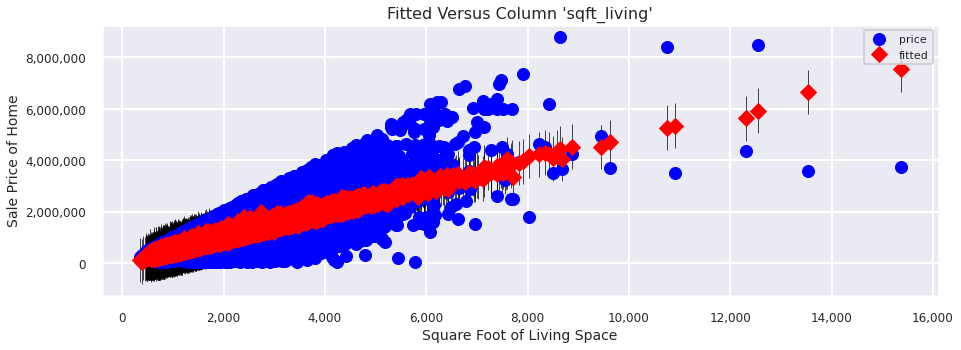

In [50]:
# visualize model from 'sqft_living' perspective

fig, ax = plt.subplots(figsize=(15,5))

sm.graphics.plot_fit(results_4, 'sqft_living', ax=ax)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Sale Price of Home', fontsize=14)
ax.set_xlabel('Square Foot of Living Space', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Fitted Versus Column 'sqft_living'", fontsize=16)
plt.savefig('fit_vs_col.png', dpi=300)
plt.show();

#### Fitted versus 'sqft_living' Graph
The graph above demonstrates the real values (blue) and the predicted values (red), with the particular predictor, ('sqft_living') on the x-axis. These predictions are made based on the entire model and not only the 'sqft_living' predictor which is why the predicted values are not a straight line.

#### Model Assumptions
For the column 'home_age', a renovated house resets the 'yr_built' of the house in calculating the age of the home. Also, both categorical columns 'view' and 'condition' have their original multiple possible values condensed into only a few possible values. Lastly, the final model only considered houses with a price per square foot of living space below 1028 dollars per square foot. Effectively, this is to exclude high priced houses due to their uncertain effects on the coefficients.

## Conclusion

## Recommendations

Best Fit Acquisitions should follow the guidelines below when purchasing each property:

* Of all the aspects of a home, 'sqft_living' metric is the most important as it has a correlation to price of .72 out of -1 to 1 and is the most impactful field of the standardized fields added to the final model. BFA should purchase homes within the 50th percentile of 'sqft_living', (1930 sqft.), or higher. There are 14,627 homes that meet this qualification in the data. 
* Prioritize purchasing homes with an above average view, which out of the filtered data free from outliers is only 1199 homes. This is because an above average view of a home adds more than double ($263,400) what an average view adds to its price, (both relative to a 'None' view)
* Purchase homes of average and above average condition with equal prioritization because, unlike the 101% increase of an above average view over an average view to home price, above average condition adds only 61% more to the home price than an average condition home (again, both relative to a below average condition)
* Lastly, if a home's condition and view are both average, prioritize purchasing the home with the most bathrooms as 'bathrooms' is more impactful on home price than an average view and condition

### Next Steps

Further analysis to better understand the housing data to improve recommendations:

* **'bedrooms' effect on 'price'**. Why does 'bedrooms' have a negative impact on the price of a home when added to a multiple linear regression model?
* **A home's 'age'**. What effect, if any, does the age of a home have on its sale price?
* **Sale month of home**. Is there any relation between the month of sale and price?